(250, 1)
(250,)


array([[ 1.        ,  1.84926373],
       [ 1.        , -0.82643854],
       [ 1.        ,  0.94942081],
       [ 1.        , -1.10438334],
       [ 1.        , -1.00021535]])

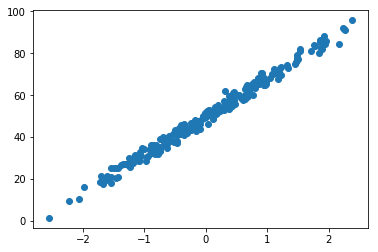

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
# make data
X,y = datasets.make_regression(n_samples=250, n_features=1, noise=2,random_state=0,bias=50)
print(X.shape)
print(y.shape)
plt.scatter(X,y)
one_column = np.ones((X.shape[0],1))
x_new = np.concatenate((one_column,X),axis=1)
x_new[:5,]

In [2]:
#w=(ATA)^-1 * ATy  最小二乘估计
W = np.dot(np.dot(np.linalg.inv(np.dot(x_new.T,x_new)),x_new.T),y)
W

array([49.79673853, 18.26507217])

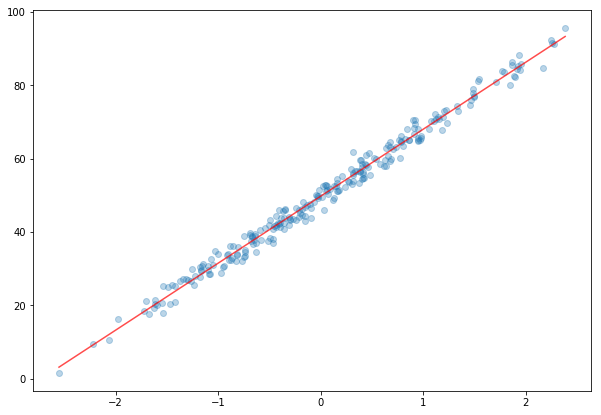

In [3]:
#y = b +wx   画出该直线  b =49.49184632   w=18.49003617 
x_0 = np.min(X)
x_1 = np.max(X)
y_0 = W[0]+W[1]*x_0
y_1 = W[0]+W[1]*x_1

plt.figure(figsize=(10,7))
plt.scatter(X,y,alpha=.3)
plt.plot([x_0,x_1],[y_0,y_1],c='r',alpha=.7)

In [4]:
#导入线性模型
from sklearn import linear_model
#导入度量,衡量指标
from sklearn import metrics
model =linear_model.LinearRegression()
#sklearn的线性回归模型会自动加上一列1元素
model.fit(X,y)  #训练模型
#预测
y_hat = model.predict(X)
print(y_hat[:5])
print(y[:5]-y_hat[:5])

[83.57367399 34.70177897 67.13797809 29.62509713 31.52773302]
[-3.50802677 -2.70282288  1.0176809   0.09485246  2.55244758]


In [5]:
#打印各项评价指标
mse = metrics.mean_squared_error(y,y_hat)
print('mse:',mse)
rmse=np.sqrt(mse)
print('rmse:',rmse)
r2 = metrics.r2_score(y,y_hat)
print('r2:',r2)

mse: 3.872253464599279
rmse: 1.9678042241542422
r2: 0.9884371809753468
